<table align="center" width=100%>
    <tr>
        <td>
            <div align="center">
                <font color="#21618C" size=18px>
                    <b>Ad Click Analysis for Targeted Marketing Optimization
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## **Problem Statement:**

This project aims to analyze ad click data to optimize digital marketing strategies. By understanding click trends, user behavior, and the effectiveness of various ads, it will help improve targeting, increase conversion rates, and reduce marketing costs. The goal is to create a predictive model that can optimize ad placements for higher engagement.


## **About Dataset**
### **About:**

This dataset provides insights into user behavior and online advertising, specifically focusing on predicting whether a user will click on an online advertisement. It contains user demographic information, browsing habits, and details related to the display of the advertisement.
This dataset is ideal for building binary classification models to predict user interactions with online ads.

### **Features:**

**id:** Unique identifier for each user.

**full_name:** User's name formatted as "UserX" for anonymity.

**age:** Age of the user (ranging from 18 to 64 years).

**gender:** The gender of the user (categorized as Male, Female, or Non-Binary).

**device_type:** The type of device used by the user when viewing the ad (Mobile, Desktop, Tablet).

**ad_position:** The position of the ad on the webpage (Top, Side, Bottom).

**browsing_history:** The user's browsing activity prior to seeing the ad (Shopping, News, Entertainment, Education, Social Media).

**time_of_day:** The time when the user viewed the ad (Morning, Afternoon, Evening, Night).

**click:** The target label indicating whether the user clicked on the ad (1 for a click, 0 for no click).



# Table of Contents

1. **[Import Libraries](#import_lib)**
2. **[Read Data](#Read_Data)**
3. **[Prepare and Analyze the Data](#data_preparation)**
    - 3.1 - [Understand the Data](#Data_Understanding)
        - 3.1.1 - [Data Type](#Data_Types)
        - 3.1.2 - [Summary Statistics](#Summary_Statistics)
        - 3.1.3 - [Analyze Relationships Between Target and Categorical Variables](#cat_num)
        - 3.1.4 - [Distribution of Numerical Variables](#num)
        - 3.1.5 - [Missing Values](#Missing_Values)
    - 3.2 - [Prepare the Data](#Data_Preparation)
        - 3.2.1 - [Dummy Encode the Categorical Variables](#dummy)
        - 3.2.2 - [Min-Max Scaling](#minmax)
4. **[Train Test Split](#traintest)**
5. **[Model Training](#modeltrain)**
    - 5.1 - [Logistic Regression](#LogisticReg)
    - 5.2 - [Decision Tree](#DecisionTree)
    - 5.3 - [Random Forest](#Randomforest)
    - 5.4 - [AdaBoost](#AdaBoost)
    - 5.5 - [Decision Tree With Pruning](#DecisionTree_with_pruning.)
    - 5.6 - [Decision Tree With Tuned Hyperparameter](#DecisionTree_with_grid_search.)
6. **[Feature Selection](#feature_selection)**
     - 6.1 - [SelectKbest](#kbest)
     - 6.2 - [Forward Selection](#forward)
     - 6.3 - [Backward Elimination](#backward)
     - 6.4 - [Recursive Feature Elimination (RFE)](#rfe)
7. **[Balancing Data](#balance)**
    - 7.1 - [UP Sampling using SMOTE](#SMOTE)
8. **[Conclusion and Interpretation](#conclusion)**




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<a id='import_lib'></a>
# 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

<a id='#Read_Data'></a>
# 2. Read Data

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ad_click_dataset.csv')
df

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1
3,5418,User5418,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0
...,...,...,...,...,...,...,...,...,...
9995,8510,User8510,NaN,NaN,Mobile,Top,Education,NaN,0
9996,7843,User7843,NaN,Female,Desktop,Bottom,Entertainment,NaN,0
9997,3914,User3914,NaN,Male,Mobile,Side,NaN,Morning,0
9998,7924,User7924,NaN,NaN,Desktop,NaN,Shopping,Morning,1


<a id='data_preparation'></a>
# 3. Data Analysis and Preparation

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Data preparation is the process of cleaning and transforming raw data before building predictive models. <br><br>
                        Here, we analyze and prepare data to perform classification techniques:<br>
                        1. Check data types. Ensure your data types are correct. Refer data definitions to validate <br>
                        2. If data types are not as per business definition, change the data types as per requirement <br>
                        3. Study summary statistics<br>
                        4. Distribution of variables<br>
                        5. Check for missing values<br><br>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Data_Understanding'></a>
## 3.1 Understand the Dataset

<a id='Data_Types'></a>
### 3.1.1 Data Type

In [4]:
df.dtypes

,0
id,int64
full_name,object
age,float64
gender,object
device_type,object
ad_position,object
browsing_history,object
time_of_day,object
click,int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10000 non-null  int64  
 1   full_name         10000 non-null  object 
 2   age               5234 non-null   float64
 3   gender            5307 non-null   object 
 4   device_type       8000 non-null   object 
 5   ad_position       8000 non-null   object 
 6   browsing_history  5218 non-null   object 
 7   time_of_day       8000 non-null   object 
 8   click             10000 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 703.2+ KB


<a id='Summary_Statistics'></a>
### 3.1.2 Summary Statistics.

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:240%">
                <font color="#21618C">
                    <b> In our dataset we have both numerical and categorical variables. Now we check for summary statistics of all the variables<br><br>
                        1. For numerical variables, use the describe()<br>
                        2. For categorical variables, use the describe(include=object)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
df.describe()

,id,age,click
count,10000.000000,5234.000000,10000.000000
mean,5060.211400,40.197363,0.650000
std,2861.758265,13.126420,0.476993
min,5.000000,18.000000,0.000000
25%,2529.000000,29.000000,0.000000
50%,5218.000000,39.500000,1.000000
75%,7466.000000,52.000000,1.000000
max,10000.000000,64.000000,1.000000


In [7]:
df.describe(include='O')

,full_name,gender,device_type,ad_position,browsing_history,time_of_day
count,10000,5307,8000,8000,5218,8000
unique,4000,3,3,3,5,4
top,User1171,Female,Desktop,Bottom,Entertainment,Morning
freq,25,1834,2754,2817,1175,2126


<a id='cat_num'></a>
### 3.1.3 Analyze Relationships Between Target and Categorical Variables

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <h2> Demographic Insights:<h2><br><br>
                        <b>1.What are the age and gender distributions of users?<br>
                        2. Does the likelihood of clicking on ads differ based on age or gender?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

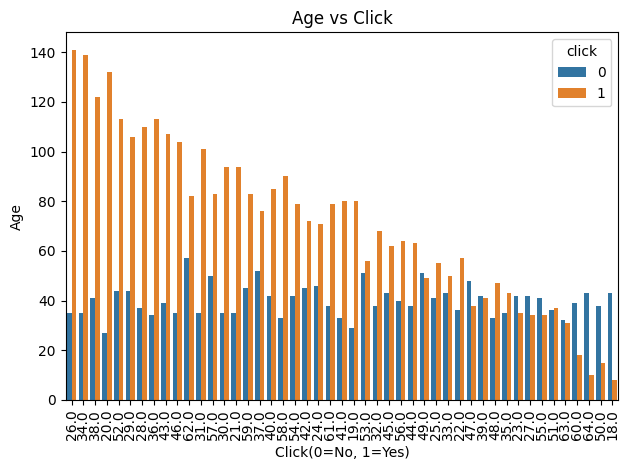

In [8]:
sns.countplot(x='age',hue='click',data=df,order=df['age'].value_counts().index)
plt.title('Age vs Click')
plt.xlabel('Click(0=No, 1=Yes)')
plt.xticks(rotation=90)
plt.ylabel('Age')
plt.tight_layout()
plt.show()

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>From the above output, we see that younger users are more likely to click on ads compared to older users.</b>
                </font>
            </div>
        </td>
    </tr>
</table>


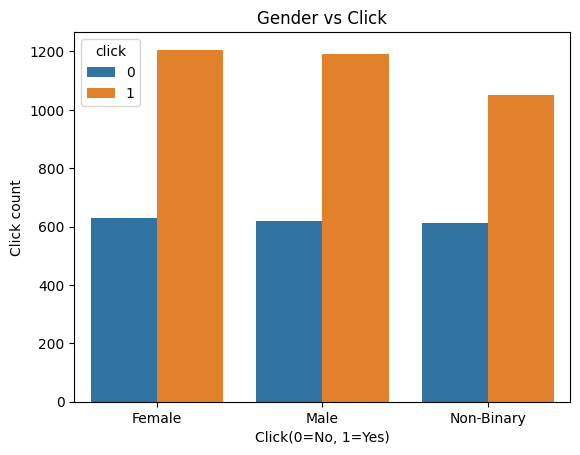

In [9]:
sns.countplot(x='gender',hue='click',data=df,order=df['gender'].value_counts().index)
plt.title('Gender vs Click')
plt.xlabel('Gender')
plt.xlabel('Click(0=No, 1=Yes)')
plt.ylabel('Click count')
plt.show()

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Conclusion:</b><br></br><br><b>From the above output, we see that females and males are more likely to click on ads compared to non-binary individuals.</br></b>
                </font>
            </div>
        </td>
    </tr>
</table>


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <h2> Device Type and Engagement:<h2><br><br>
                        <b>1.How does the device type affect the click rate?<br>
                        2. Are certain devices more associated with specific user demographics or behaviors?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

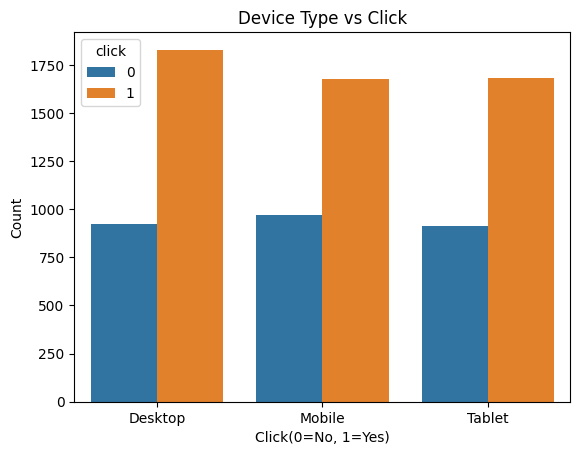

In [10]:
sns.countplot(x='device_type',hue='click',data=df,order=df['device_type'].value_counts().index)
plt.title('Device Type vs Click')
plt.xlabel('Device Type')
plt.xlabel('Click(0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Conclusion:</b><br></br><br><b>From the above output, it seems like desktop is the most associated device with ad click.</br></b>
                </font>
            </div>
        </td>
    </tr>
</table>


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <h2> Ad Position Impact:<h2><br>
                        <b>Is there a relationship between the ad position and click-through rates?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

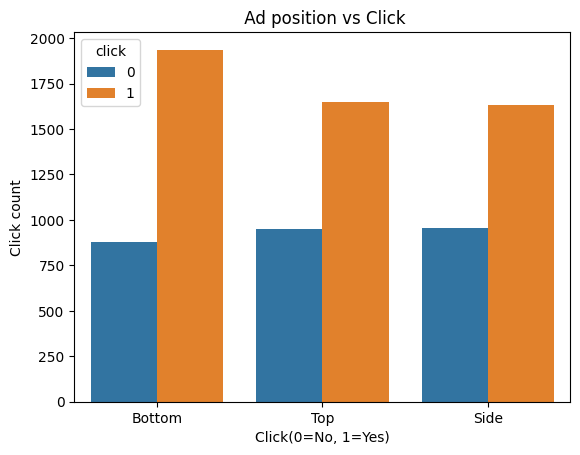

In [11]:
sns.countplot(x='ad_position',hue='click',data=df,order=df['ad_position'].value_counts().index)
plt.title(' Ad position vs Click')
plt.xlabel('Ad position')
plt.xlabel('Click(0=No, 1=Yes)')
plt.ylabel('Click count')
plt.show()

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Conclusion:</b><br></br><br><b>From the above output, it seems like ads at bottom side are clicked the most.</br></b>
                </font>
            </div>
        </td>
    </tr>
</table>


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <h2>Time of Day Influence:<h2><br><br>
                        <b>Is there a trend in user engagement with ads across different times of the day (Morning, Afternoon, Evening, Night)?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

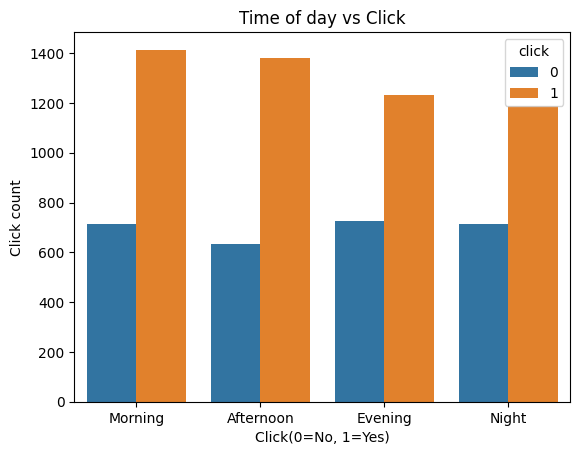

In [12]:
sns.countplot(x='time_of_day',hue='click',data=df,order=df['time_of_day'].value_counts().index)
plt.title('Time of day vs Click')
plt.xlabel('Time of day')
plt.xlabel('Click(0=No, 1=Yes)')
plt.ylabel('Click count')
plt.show()

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Conclusion:</b><br></br><br><b>From the above output, it seems like Morning and Afternoon is the busiest hour.</br></b>
                </font>
            </div>
        </td>
    </tr>
</table>


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <h2> Browsing History and Behavior:<h2><br><br>
                        <b>How does a user’s browsing history (Shopping, Social Media, etc.) correlate with their click behavior?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

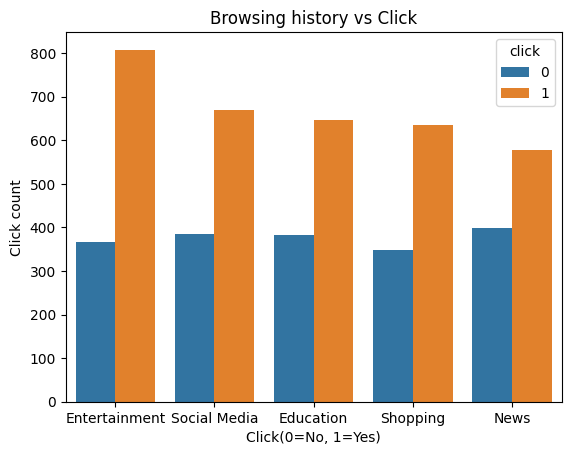

In [13]:
sns.countplot(x='browsing_history',hue='click',data=df,order=df['browsing_history'].value_counts().index)
plt.title('Browsing history vs Click')
plt.xlabel('Browsing history')
plt.xlabel('Click(0=No, 1=Yes)')
plt.ylabel('Click count')
plt.show()

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Conclusion:</b><br></br><br><b>From the above output, it seems like Entertainment and social media is the most used platforms for ads.</br></b>
                </font>
            </div>
        </td>
    </tr>
</table>


<a id='num'></a>
### 3.1.4 Distribution of Numerical Variables.

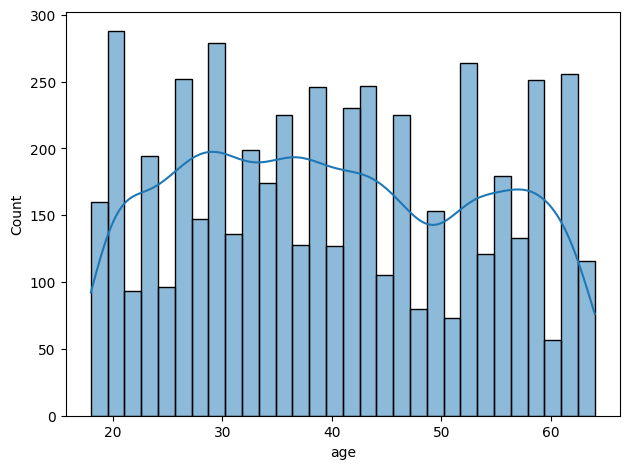

In [14]:
sns.histplot(data=df,x='age',bins=30,kde=True)
plt.tight_layout()
plt.show()

<a id='Missing_Values'></a>
### 3.1.5 Missing Values.

In [15]:
df.isnull().sum()

,0
id,0
full_name,0
age,4766
gender,4693
device_type,2000
ad_position,2000
browsing_history,4782
time_of_day,2000
click,0


In [16]:
df.drop(['id','full_name'],axis=1,inplace=True)

In [17]:
df.dropna(subset=['time_of_day'],axis=0,inplace=True)

In [18]:
df.isnull().sum()

,0
age,3809
gender,3734
device_type,1625
ad_position,1592
browsing_history,3820
time_of_day,0
click,0


### Filling null values using simple imputer.

In [19]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean')
df['age']=imputer.fit_transform(df[['age']])

imupter1=SimpleImputer(strategy='most_frequent')
cat_cols=['gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day']
df[cat_cols]=imupter1.fit_transform(df[cat_cols])

In [20]:
df.isnull().sum()

,0
age,0
gender,0
device_type,0
ad_position,0
browsing_history,0
time_of_day,0
click,0


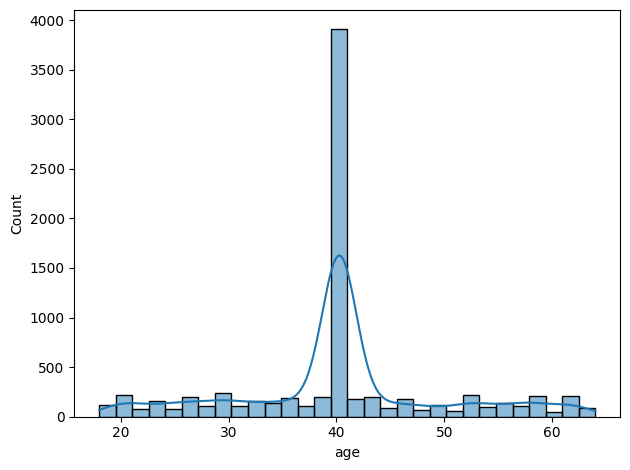

In [21]:
sns.histplot(data=df,x='age',bins=30,kde=True)
plt.tight_layout()
plt.show()

<a id='Data_Preparation'></a>
## 3.2 Prepare the data.

In [22]:
cat_cols=df.drop(['age','click'],axis=1)
num_cols=df[['age']]
cat_cols

,gender,device_type,ad_position,browsing_history,time_of_day
0,Female,Desktop,Top,Shopping,Afternoon
2,Non-Binary,Desktop,Side,Education,Night
3,Male,Desktop,Bottom,Entertainment,Evening
4,Non-Binary,Desktop,Bottom,Social Media,Morning
5,Non-Binary,Desktop,Bottom,Social Media,Evening
...,...,...,...,...,...
9993,Female,Desktop,Bottom,Entertainment,Morning
9994,Non-Binary,Desktop,Bottom,News,Morning
9997,Male,Mobile,Side,Entertainment,Morning
9998,Female,Desktop,Bottom,Shopping,Morning


<a id='dummy'></a>
### 3.2.1 Dummy Encode the Categorical Variables.

In [23]:
dummy_cols=pd.get_dummies(cat_cols,drop_first=True,dtype='int64')
dummy_cols.reset_index(drop=True,inplace=True)
dummy_cols

,gender_Male,gender_Non-Binary,device_type_Mobile,device_type_Tablet,ad_position_Side,ad_position_Top,browsing_history_Entertainment,browsing_history_News,browsing_history_Shopping,browsing_history_Social Media,time_of_day_Evening,time_of_day_Morning,time_of_day_Night
0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,0,1,0,0,1,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,1,0,1,0
4,0,1,0,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0,0,0,0,0,0,1,0,0,0,0,1,0
7996,0,1,0,0,0,0,0,1,0,0,0,1,0
7997,1,0,1,0,1,0,1,0,0,0,0,1,0
7998,0,0,0,0,0,0,0,0,1,0,0,1,0


<a id='minmax'></a>
### 3.2.2 Scalling numerical feature.

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
num_cols=pd.DataFrame(scaler.fit_transform(num_cols),columns=num_cols.columns)
num_cols.reset_index(drop=True,inplace=True)
num_cols

,age
0,0.086957
1,0.500000
2,0.347826
3,0.456522
4,0.484044
...,...
7995,0.543478
7996,0.484044
7997,0.484044
7998,0.484044


In [25]:
concat_df=pd.concat([dummy_cols,num_cols],axis=1)
concat_df

,gender_Male,gender_Non-Binary,device_type_Mobile,device_type_Tablet,ad_position_Side,ad_position_Top,browsing_history_Entertainment,browsing_history_News,browsing_history_Shopping,browsing_history_Social Media,time_of_day_Evening,time_of_day_Morning,time_of_day_Night,age
0,0,0,0,0,0,1,0,0,1,0,0,0,0,0.086957
1,0,1,0,0,1,0,0,0,0,0,0,0,1,0.500000
2,1,0,0,0,0,0,1,0,0,0,1,0,0,0.347826
3,0,1,0,0,0,0,0,0,0,1,0,1,0,0.456522
4,0,1,0,0,0,0,0,0,0,1,1,0,0,0.484044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0,0,0,0,0,0,1,0,0,0,0,1,0,0.543478
7996,0,1,0,0,0,0,0,1,0,0,0,1,0,0.484044
7997,1,0,1,0,1,0,1,0,0,0,0,1,0,0.484044
7998,0,0,0,0,0,0,0,0,1,0,0,1,0,0.484044


<a id='traintest'></a>
## 4. Train Test Split.

In [26]:
 from sklearn.model_selection import train_test_split

In [27]:
X=concat_df
y=df['click']

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((6400, 14), (1600, 14), (6400,), (1600,))

<a id='modeltrain'></a>
## 5. Model Training.

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,cohen_kappa_score,roc_auc_score,precision_score,recall_score,f1_score
from sklearn.model_selection import GridSearchCV

<a id='LogisticReg'></a>
### 5.1 Logistic Regression.

In [30]:
model_lr=LogisticRegression()
model_lr.fit(X_train,y_train)
y_pred_lr=model_lr.predict(X_test)

In [31]:
lr_acc=accuracy_score(y_test,y_pred_lr)
print(lr_acc)

0.66625


In [32]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00       535
           1       0.67      1.00      0.80      1065

    accuracy                           0.67      1600
   macro avg       0.83      0.50      0.40      1600
weighted avg       0.78      0.67      0.53      1600



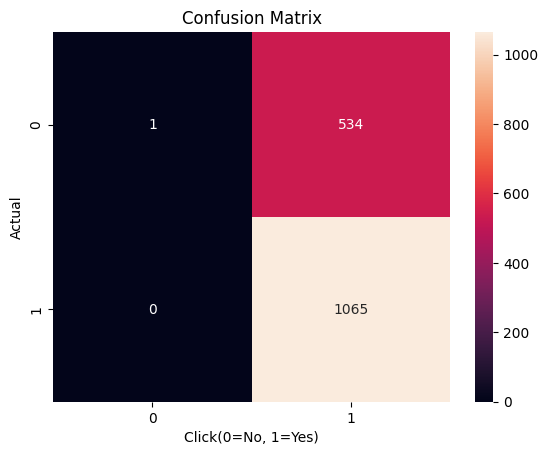

In [33]:
sns.heatmap(confusion_matrix(y_test,y_pred_lr),annot=True,fmt='d')
plt.xlabel('Predicted')
plt.xlabel('Click(0=No, 1=Yes)')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [34]:
cohen_lr=cohen_kappa_score(y_test,y_pred_lr)
roc_lr=roc_auc_score(y_test,y_pred_lr)
print(f'Cohen kappa score:{cohen_kappa_score(y_test,y_pred_lr)}. \nROC AUC score:{roc_auc_score(y_test,y_pred_lr)}')

Cohen kappa score:0.0024867780463030398. 
ROC AUC score:0.5009345794392523


In [35]:
pre_lr=precision_score(y_test,y_pred_lr)
recall_lr=recall_score(y_test,y_pred_lr)
f1_lr=f1_score(y_test,y_pred_lr)
print(f'Precision score:{pre_lr}. \nRecall score:{recall_lr}. \nF1 score:{f1_lr}')

Precision score:0.6660412757973734. 
Recall score:1.0. 
F1 score:0.7995495495495496


<a id='DecisionTree'></a>
### 5.2 Decision Tree.

In [36]:
model_dt=DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train,y_train)
y_pred_dt=model_dt.predict(X_test)

In [37]:
dt_acc=accuracy_score(y_test,y_pred_dt)
print(dt_acc)

0.765625


In [38]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.71      0.51      0.59       535
           1       0.78      0.89      0.84      1065

    accuracy                           0.77      1600
   macro avg       0.75      0.70      0.71      1600
weighted avg       0.76      0.77      0.75      1600



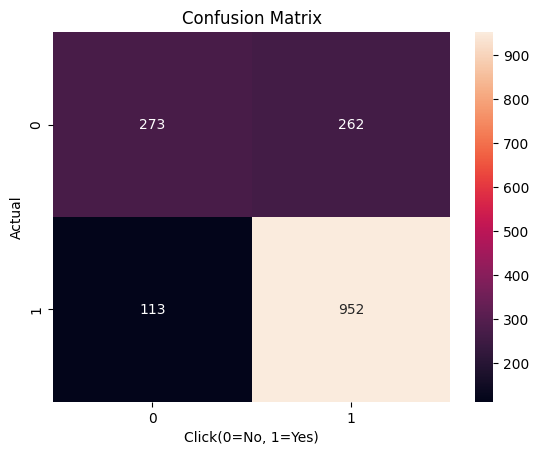

In [39]:
sns.heatmap(confusion_matrix(y_test,y_pred_dt),annot=True,fmt='d')
plt.xlabel('Predicted')
plt.xlabel('Click(0=No, 1=Yes)')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [40]:
cohen_dt=cohen_kappa_score(y_test,y_pred_dt)
roc_dt=roc_auc_score(y_test,y_pred_dt)
print(f'Cohen kappa score:{cohen_kappa_score(y_test,y_pred_dt)}. \nROC AUC score:{roc_auc_score(y_test,y_pred_dt)}')

Cohen kappa score:0.43427181353598965. 
ROC AUC score:0.7020885437233996


In [41]:
pre_dt=precision_score(y_test,y_pred_dt)
recall_dt=recall_score(y_test,y_pred_dt)
f1_dt=f1_score(y_test,y_pred_dt)
print(f'Precision score:{pre_dt}. \nRecall score:{recall_dt}. \nF1 score:{f1_dt}')

Precision score:0.7841845140032949. 
Recall score:0.8938967136150234. 
F1 score:0.8354541465555069


<a id='Randomforest'></a>
### 5.3 Random Forest.

In [42]:
model_rf=RandomForestClassifier(random_state=42)
model_rf.fit(X_train,y_train)
y_pred_rf=model_rf.predict(X_test)

In [43]:
rf_acc=accuracy_score(y_test,y_pred_rf)
print(rf_acc)

0.75625


In [44]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.72      0.45      0.55       535
           1       0.77      0.91      0.83      1065

    accuracy                           0.76      1600
   macro avg       0.74      0.68      0.69      1600
weighted avg       0.75      0.76      0.74      1600



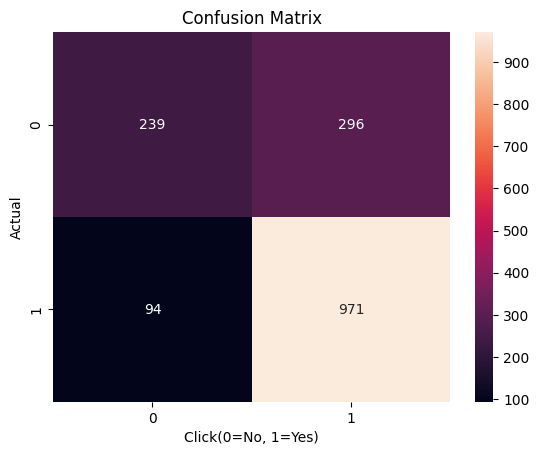

In [45]:
sns.heatmap(confusion_matrix(y_test,y_pred_rf),annot=True,fmt='d')
plt.xlabel('Predicted')
plt.xlabel('Click(0=No, 1=Yes)')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [46]:
cohen_rf=cohen_kappa_score(y_test,y_pred_rf)
roc_rf=roc_auc_score(y_test,y_pred_rf)
print(f'Cohen kappa score:{cohen_kappa_score(y_test,y_pred_rf)}. \nROC AUC score:{roc_auc_score(y_test,y_pred_rf)}')

Cohen kappa score:0.39563579308274166. 
ROC AUC score:0.6792330305822474


In [47]:
pre_rf=precision_score(y_test,y_pred_rf)
recall_rf=recall_score(y_test,y_pred_rf)
f1_rf=f1_score(y_test,y_pred_rf)
print(f'Precision score:{pre_rf}. \nRecall score:{recall_rf}. \nF1 score:{f1_rf}')

Precision score:0.7663772691397001. 
Recall score:0.9117370892018779. 
F1 score:0.8327615780445968


<a id='AdaBoost'></a>
### 5.4 AdaBoost.

In [48]:
from sklearn.ensemble import AdaBoostClassifier
model_Ada= AdaBoostClassifier(base_estimator=model_rf,learning_rate=0.05,random_state=42)
model_Ada.fit(X_train,y_train)
y_pred_Ada=model_Ada.predict(X_test)

In [49]:
ada_acc=accuracy_score(y_test,y_pred_Ada)
print(ada_acc)

0.76


In [50]:
print(classification_report(y_test,y_pred_Ada))

              precision    recall  f1-score   support

           0       0.72      0.47      0.57       535
           1       0.77      0.91      0.83      1065

    accuracy                           0.76      1600
   macro avg       0.74      0.69      0.70      1600
weighted avg       0.75      0.76      0.74      1600



Text(0.5, 1.0, 'Confusion Matrix')

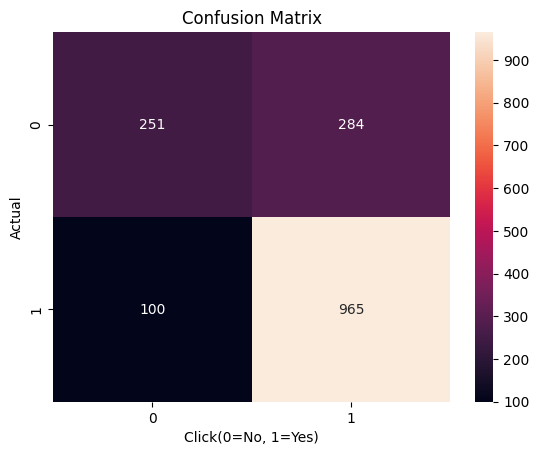

In [51]:
sns.heatmap(confusion_matrix(y_test,y_pred_Ada),annot=True,fmt='d')
plt.xlabel('Predicted')
plt.xlabel('Click(0=No, 1=Yes)')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [52]:
cohen_ada=cohen_kappa_score(y_test,y_pred_Ada)
roc_ada=roc_auc_score(y_test,y_pred_Ada)
print(f'Cohen kappa score:{cohen_kappa_score(y_test,y_pred_Ada)}. \nROC AUC score:{roc_auc_score(y_test,y_pred_Ada)}')

Cohen kappa score:0.41038165887738354. 
ROC AUC score:0.6876310824448246


In [53]:
pre_ada=precision_score(y_test,y_pred_Ada)
recall_ada=recall_score(y_test,y_pred_Ada)
f1_ada=f1_score(y_test,y_pred_Ada)
print(f'Precision score:{pre_ada}. \nRecall score:{recall_ada}. \nF1 score:{f1_ada}')

Precision score:0.7726180944755805. 
Recall score:0.9061032863849765. 
F1 score:0.8340535868625756


<a id='DecisionTree_with_pruning.'></a>
### 5.5 Decision Tree with tuned pruning.

In [54]:
dt_prune=DecisionTreeClassifier(random_state=42,ccp_alpha=0.0001)
dt_prune.fit(X_train,y_train)
y_pred_dt_prune=dt_prune.predict(X_test)

In [55]:
acc_prune=accuracy_score(y_test,y_pred_dt_prune)
print(acc_prune)

0.775


In [56]:
print(classification_report(y_test,y_pred_dt_prune))

              precision    recall  f1-score   support

           0       0.75      0.50      0.60       535
           1       0.78      0.91      0.84      1065

    accuracy                           0.78      1600
   macro avg       0.76      0.71      0.72      1600
weighted avg       0.77      0.78      0.76      1600



<a id='DecisionTree_with_grid_search.'></a>
### 5.6 Decision Tree with tuned hyperparameter.

In [57]:
grid_param={'criterion':['gini','entropy'],'max_depth':range(10,50,10),'min_samples_leaf':range(2,20,1),'min_samples_split':range(2,20,1),'ccp_alpha':[0.1,0.01,0.001,0.0001]}
grid_search=GridSearchCV(estimator=model_dt,param_grid=grid_param,cv=5,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 10368 candidates, totalling 51840 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001, 0.0001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 50, 10),
                         'min_samples_leaf': range(2, 20),
                         'min_samples_split': range(2, 20)},
             verbose=2)

In [58]:
grid_search.best_params_

{'ccp_alpha': 0.0001,
 'criterion': 'gini',
 'max_depth': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [59]:
model_dt_gs=DecisionTreeClassifier(criterion='gini',max_depth=20,min_samples_leaf=2,min_samples_split=2,ccp_alpha=0.0001,random_state=42)
model_dt_gs.fit(X_train,y_train)
y_pred_dt_gs=model_dt_gs.predict(X_test)
print(accuracy_score(y_test,y_pred_dt_gs))

0.759375


In [60]:
gs_acc=accuracy_score(y_test,y_pred_dt_gs)
print(gs_acc)

0.759375


In [61]:
print(classification_report(y_test,y_pred_dt_gs))

              precision    recall  f1-score   support

           0       0.72      0.45      0.56       535
           1       0.77      0.91      0.83      1065

    accuracy                           0.76      1600
   macro avg       0.75      0.68      0.70      1600
weighted avg       0.75      0.76      0.74      1600



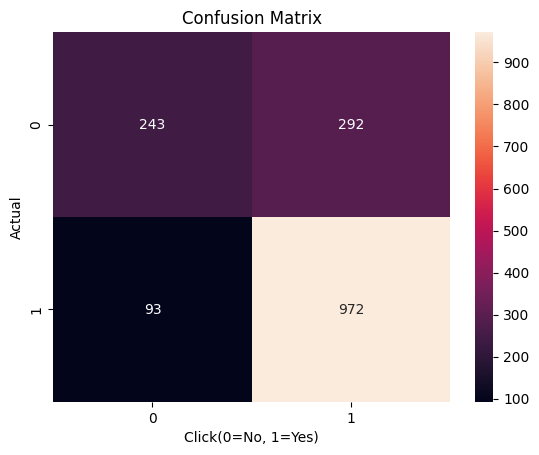

In [62]:
sns.heatmap(confusion_matrix(y_test,y_pred_dt_gs),annot=True,fmt='d')
plt.xlabel('Predicted')
plt.xlabel('Click(0=No, 1=Yes)')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [63]:
cohen_gs=cohen_kappa_score(y_test,y_pred_dt_gs)
roc_gs=roc_auc_score(y_test,y_pred_dt_gs)
print(f'Cohen kappa score:{cohen_kappa_score(y_test,y_pred_dt_gs)}. \nROC AUC score:{roc_auc_score(y_test,y_pred_dt_gs)}')

Cohen kappa score:0.4043014080148537. 
ROC AUC score:0.6834408319073318


In [64]:
pre_dt_gs=precision_score(y_test,y_pred_dt_gs)
recall__dt_gs=recall_score(y_test,y_pred_dt_gs)
f1_dt_gs=f1_score(y_test,y_pred_dt_gs)
print(f'Precision score:{pre_dt_gs}. \nRecall score:{recall__dt_gs}. \nF1 score:{f1_dt_gs}')

Precision score:0.7689873417721519. 
Recall score:0.9126760563380282. 
F1 score:0.8346930012881065


<a id='feature_selection'></a>
## 6. Feature Selection.

<a id='kbest'></a>
### 6.1 SelectKBest.

In [65]:
from sklearn.feature_selection import SelectKBest,mutual_info_classif,chi2

In [66]:
acc=[]
for i in range(1,X_train.shape[1]+1):
  selector=SelectKBest(chi2,k=i)
  selcted_features=selector.fit_transform(X_train,y_train)
  model_dt.fit(selcted_features,y_train)
  y_pred_dt2=model_dt.predict(selector.transform(X_test))
  acc.append(accuracy_score(y_test,y_pred_dt2))

print(acc.index(max(acc))+1)

13


In [67]:
selector1=SelectKBest(chi2,k=13)
selcted_features1=selector1.fit_transform(X_train,y_train)

selected_features=selector1.get_feature_names_out()
selected_features

array(['gender_Male', 'gender_Non-Binary', 'device_type_Mobile',
       'ad_position_Side', 'ad_position_Top',
       'browsing_history_Entertainment', 'browsing_history_News',
       'browsing_history_Shopping', 'browsing_history_Social Media',
       'time_of_day_Evening', 'time_of_day_Morning', 'time_of_day_Night',
       'age'], dtype=object)

In [68]:
sel_X_train=X_train[selected_features]
sel_X_test=X_test[selected_features]
sel_X_train.shape,sel_X_test.shape

((6400, 13), (1600, 13))

In [69]:
model_dt.fit(sel_X_train,y_train)
y_pred_dt_k_chi=model_dt.predict(sel_X_test)

In [70]:
dt_k_chi_acc=accuracy_score(y_test,y_pred_dt_k_chi)
print(dt_k_chi_acc)

0.76625


In [71]:
print(classification_report(y_test,y_pred_dt_k_chi))

              precision    recall  f1-score   support

           0       0.71      0.50      0.59       535
           1       0.78      0.90      0.84      1065

    accuracy                           0.77      1600
   macro avg       0.75      0.70      0.71      1600
weighted avg       0.76      0.77      0.75      1600



Text(0.5, 1.0, 'Confusion Matrix')

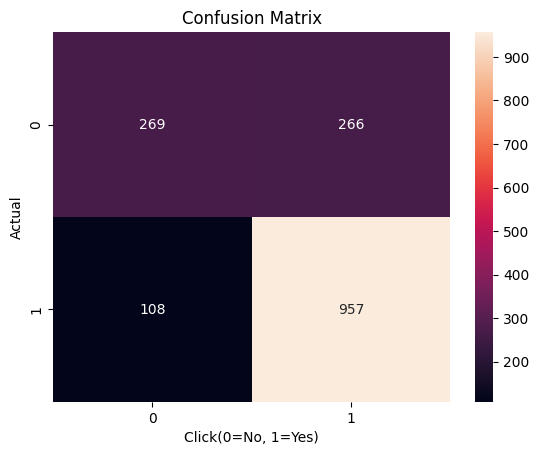

In [72]:
sns.heatmap(confusion_matrix(y_test,y_pred_dt_k_chi),annot=True,fmt='d')
plt.xlabel('Predicted')
plt.xlabel('Click(0=No, 1=Yes)')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [73]:
cohen_dt3=cohen_kappa_score(y_test,y_pred_dt_k_chi)
roc_dt3=roc_auc_score(y_test,y_pred_dt_k_chi)
print(f'Cohen kappa score:{cohen_kappa_score(y_test,y_pred_dt_k_chi)}. \nROC AUC score:{roc_auc_score(y_test,y_pred_dt_k_chi)}')

Cohen kappa score:0.4332313579147764. 
ROC AUC score:0.7006976438067659


## KBest using Mutual Info Classif.

In [74]:
acc1=[]
for i in range(1,X_train.shape[1]+1):
  selector=SelectKBest(mutual_info_classif,k=i)
  selcted_features=selector.fit_transform(X_train,y_train)
  model_dt.fit(selcted_features,y_train)
  y_pred_dt4=model_dt.predict(selector.transform(X_test))
  acc1.append(accuracy_score(y_test,y_pred_dt4))
print(acc1.index(max(acc1))+1)

12


In [75]:
selector2=SelectKBest(mutual_info_classif,k=13)
selcted_features1=selector2.fit_transform(X_train,y_train)

selected_features=selector2.get_feature_names_out()
selected_features

array(['gender_Non-Binary', 'device_type_Mobile', 'device_type_Tablet',
       'ad_position_Side', 'ad_position_Top',
       'browsing_history_Entertainment', 'browsing_history_News',
       'browsing_history_Shopping', 'browsing_history_Social Media',
       'time_of_day_Evening', 'time_of_day_Morning', 'time_of_day_Night',
       'age'], dtype=object)

In [76]:
sel1_X_train=X_train[selected_features]
sel1_X_test=X_test[selected_features]
sel1_X_train.shape,sel1_X_test.shape

((6400, 13), (1600, 13))

In [77]:
model_dt.fit(sel1_X_train,y_train)
y_pred_dt_k_mi=model_dt.predict(sel1_X_test)

In [78]:
df_k_mi_acc=accuracy_score(y_test,y_pred_dt_k_mi)
print(df_k_mi_acc)

0.7725


In [79]:
print(classification_report(y_test,y_pred_dt_k_mi))

              precision    recall  f1-score   support

           0       0.73      0.51      0.60       535
           1       0.79      0.90      0.84      1065

    accuracy                           0.77      1600
   macro avg       0.76      0.71      0.72      1600
weighted avg       0.77      0.77      0.76      1600



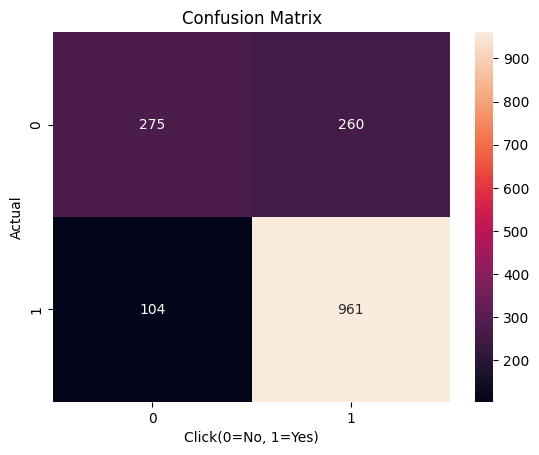

In [80]:
sns.heatmap(confusion_matrix(y_test,y_pred_dt_k_mi),annot=True,fmt='d')
plt.xlabel('Predicted')
plt.xlabel('Click(0=No, 1=Yes)')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [81]:
cohen_dt_k_mi=cohen_kappa_score(y_test,y_pred_dt_k_mi)
roc_dt_k_mi=roc_auc_score(y_test,y_pred_dt_k_mi)
print(f'Cohen kappa score:{cohen_kappa_score(y_test,y_pred_dt_k_mi)}. \nROC AUC score:{roc_auc_score(y_test,y_pred_dt_k_mi)}')

Cohen kappa score:0.4489388477296168. 
ROC AUC score:0.7081830547145802


In [82]:
pre_dt_k_mi=precision_score(y_test,y_pred_dt_k_mi)
recall_dt_k_mi=recall_score(y_test,y_pred_dt_k_mi)
f1_dt_k_mi=f1_score(y_test,y_pred_dt_k_mi)
print(f'Precision score:{pre_dt_k_mi}. \nRecall score:{recall_dt_k_mi}. \nF1 score:{f1_dt_k_mi}')

Precision score:0.7870597870597871. 
Recall score:0.9023474178403755. 
F1 score:0.8407699037620296


<a id='forward'></a>
### 6.2 Forward Selection.

In [83]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
forward_selector=sfs(estimator=DecisionTreeClassifier(random_state=42),k_features='best',forward=True,scoring='accuracy',cv=5,n_jobs=-1,verbose=2)
forward_feature=forward_selector.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    0.3s finished

[2024-09-19 16:13:27] Features: 1/14 -- score: 0.659375[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  13 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    0.3s finished

[2024-09-19 16:13:27] Features: 2/14 -- score: 0.6709375[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.3s finished

[2024-09-19 16:13:27] Features: 3/14 -- score: 0.68046875[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    0.3s finished

[2024-09-19 16:13:28] Features: 4/14 -- score: 0.6889062499999999[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-

In [84]:
forward_feature.k_feature_names_

('gender_Male',
 'gender_Non-Binary',
 'ad_position_Side',
 'ad_position_Top',
 'browsing_history_Entertainment',
 'browsing_history_News',
 'browsing_history_Shopping',
 'browsing_history_Social Media',
 'time_of_day_Evening',
 'time_of_day_Morning',
 'time_of_day_Night',
 'age')

In [85]:
for_X_train=X_train.filter(forward_feature.k_feature_names_)
for_X_test=X_test.filter(forward_feature.k_feature_names_)
for_X_train.shape,for_X_test.shape

((6400, 12), (1600, 12))

In [86]:
model_dt.fit(for_X_train,y_train)
y_pred_dt_fs=model_dt.predict(for_X_test)
print(accuracy_score(y_test,y_pred_dt_fs))

0.763125


<a id='backward'></a>
### 6.3 Backward Elimination.

In [87]:
backward_selector=sfs(estimator=DecisionTreeClassifier(random_state=42),k_features='best',forward=False,scoring='accuracy',cv=5,n_jobs=-1,verbose=2)
backward_feature=backward_selector.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    1.5s finished

[2024-09-19 16:13:34] Features: 13/1 -- score: 0.73796875[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  13 | elapsed:    1.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    1.1s finished

[2024-09-19 16:13:35] Features: 12/1 -- score: 0.74296875[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.6s finished

[2024-09-19 16:13:35] Features: 11/1 -- score: 0.74[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    0.5s finished

[2024-09-19 16:13:36] Features: 10/1 -- score: 0.73953125[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  

In [88]:
backward_feature.k_feature_names_

('gender_Male',
 'device_type_Mobile',
 'device_type_Tablet',
 'ad_position_Side',
 'ad_position_Top',
 'browsing_history_News',
 'browsing_history_Shopping',
 'browsing_history_Social Media',
 'time_of_day_Evening',
 'time_of_day_Morning',
 'time_of_day_Night',
 'age')

In [89]:
back_X_train=X_train.filter(backward_feature.k_feature_names_)
back_X_test=X_test.filter(backward_feature.k_feature_names_)
back_X_train.shape,back_X_test.shape

((6400, 12), (1600, 12))

In [90]:
model_dt.fit(back_X_train,y_train)
y_pred_dt_be=model_dt.predict(back_X_test)
print(accuracy_score(y_test,y_pred_dt_be))

0.763125


<a id='rfe'></a>
### 6.4 Recursive Feature Elimination(RFE).

In [91]:
from sklearn.feature_selection import RFECV
rfecv=RFECV(estimator=model_dt,min_features_to_select=1,step=1,cv=5,scoring='accuracy')
rfecv.fit(X_train,y_train)

print('Optimal number of features:',rfecv.n_features_)

Optimal number of features: 14


In [92]:
features_name=X_train.columns[rfecv.support_]
features_name

Index(['gender_Male', 'gender_Non-Binary', 'device_type_Mobile',
       'device_type_Tablet', 'ad_position_Side', 'ad_position_Top',
       'browsing_history_Entertainment', 'browsing_history_News',
       'browsing_history_Shopping', 'browsing_history_Social Media',
       'time_of_day_Evening', 'time_of_day_Morning', 'time_of_day_Night',
       'age'],
      dtype='object')

In [93]:
rfe_X_train=X_train[features_name]
rfe_X_test=X_test[features_name]
rfe_X_train.shape,rfe_X_test.shape

((6400, 14), (1600, 14))

In [94]:
model_dt.fit(rfe_X_train,y_train)
y_pred_dt_rfe=model_dt.predict(rfe_X_test)
print(accuracy_score(y_test,y_pred_dt_rfe))

0.765625


In [95]:
dt_rfe_acc=accuracy_score(y_test,y_pred_dt_rfe)

In [96]:
print(classification_report(y_test,y_pred_dt_rfe))

              precision    recall  f1-score   support

           0       0.71      0.51      0.59       535
           1       0.78      0.89      0.84      1065

    accuracy                           0.77      1600
   macro avg       0.75      0.70      0.71      1600
weighted avg       0.76      0.77      0.75      1600



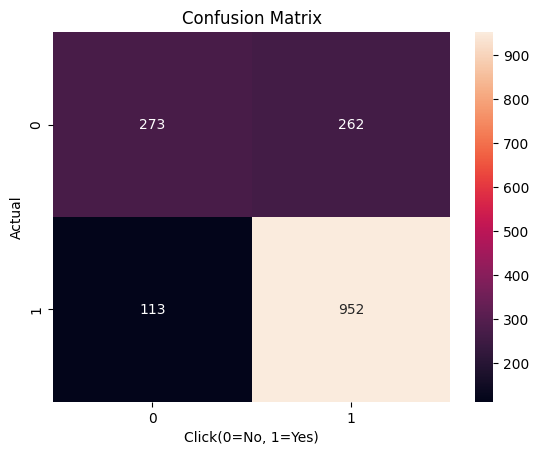

In [97]:
sns.heatmap(confusion_matrix(y_test,y_pred_dt_rfe),annot=True,fmt='d')
plt.xlabel('Predicted')
plt.xlabel('Click(0=No, 1=Yes)')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [98]:
cohen_dt_rfe=cohen_kappa_score(y_test,y_pred_dt_rfe)
roc_dt_rfe=roc_auc_score(y_test,y_pred_dt_rfe)
print(f'Cohen kappa score:{cohen_kappa_score(y_test,y_pred_dt_rfe)}. \nROC AUC score:{roc_auc_score(y_test,y_pred_dt_rfe)}')

Cohen kappa score:0.43427181353598965. 
ROC AUC score:0.7020885437233996


In [99]:
pre_dt_rfe=precision_score(y_test,y_pred_dt_rfe)
recall_dt_rfe=recall_score(y_test,y_pred_dt_rfe)
f1_dt_rfe=f1_score(y_test,y_pred_dt_rfe)
print(f'Precision score:{pre_dt_rfe}. \nRecall score:{recall_dt_rfe}. \nF1 score:{f1_dt_rfe}')

Precision score:0.7841845140032949. 
Recall score:0.8938967136150234. 
F1 score:0.8354541465555069


<a id='balance'></a>
## 7. Balancing data.

In [100]:
df['click'].value_counts()

,count
click,
1,5216
0,2784


<a id='SMOTE'></a>
### 7.1 UP Sampling using SMOTE.

In [101]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_smote,y_smote=smote.fit_resample(X,y)

In [102]:
X_train_smote,X_test_smote,y_train_smote,y_test_smote=train_test_split(X_smote,y_smote,test_size=0.2,random_state=42)
X_train_smote.shape,X_test_smote.shape,y_train_smote.shape,y_test_smote.shape

((8345, 14), (2087, 14), (8345,), (2087,))

### Linear Regression.

In [103]:
model_lr.fit(X_train_smote,y_train_smote)
y_pred_lr_smote=model_lr.predict(X_test_smote)
print(accuracy_score(y_test_smote,y_pred_lr_smote))

0.5313847628174413


### Decision Tree.

In [104]:
model_dt.fit(X_train_smote,y_train_smote)
y_pred_dt_smote=model_dt.predict(X_test_smote)

In [105]:
dt_smote_acc=accuracy_score(y_test_smote,y_pred_dt_smote)
print(dt_smote_acc)

0.7589841878294202


In [106]:
print(classification_report(y_test_smote,y_pred_dt_smote))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75      1058
           1       0.74      0.80      0.77      1029

    accuracy                           0.76      2087
   macro avg       0.76      0.76      0.76      2087
weighted avg       0.76      0.76      0.76      2087



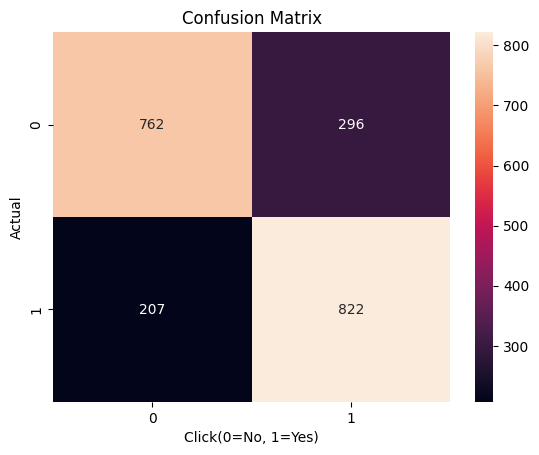

In [107]:
sns.heatmap(confusion_matrix(y_test_smote,y_pred_dt_smote),annot=True,fmt='d')
plt.xlabel('Predicted')
plt.xlabel('Click(0=No, 1=Yes)')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [108]:
cohen_dt_smote=cohen_kappa_score(y_test_smote,y_pred_dt_smote)
roc_dt_smote=roc_auc_score(y_test_smote,y_pred_dt_smote)
print(f'Cohen kappa score:{cohen_kappa_score(y_test_smote,y_pred_dt_smote)}. \nROC AUC score:{roc_auc_score(y_test_smote,y_pred_dt_smote)}')

Cohen kappa score:0.5184461075852831. 
ROC AUC score:0.7595303311710858


In [109]:
dt_prune.fit(X_train_smote,y_train_smote)
y_pred_dt_prune_smote=dt_prune.predict(X_test_smote)

In [110]:
print(accuracy_score(y_test_smote,y_pred_dt_prune_smote))

0.7527551509343555


### Ada Boost.

In [111]:
model_Ada.fit(X_train_smote,y_train_smote)
y_pred_Ada_smote=model_Ada.predict(X_test_smote)
print(accuracy_score(y_test_smote,y_pred_Ada_smote))

0.7460469573550551


### Select KBest




In [112]:
acc2=[]
for i in range(1,X_train.shape[1]+1):
  selector=SelectKBest(mutual_info_classif,k=i)
  selcted_features=selector.fit_transform(X_train_smote,y_train_smote)
  model_dt.fit(selcted_features,y_train_smote)
  y_pred_dt_smote_k_mi=model_dt.predict(selector.transform(X_test_smote))
  acc2.append(accuracy_score(y_test_smote,y_pred_dt_smote_k_mi))
print(acc2.index(max(acc2))+1)

14


In [113]:
selector3=SelectKBest(mutual_info_classif,k=14)
selcted_features3=selector3.fit_transform(X_train_smote,y_train_smote)

selected_features_smote=selector3.get_feature_names_out()
selected_features_smote

array(['gender_Male', 'gender_Non-Binary', 'device_type_Mobile',
       'device_type_Tablet', 'ad_position_Side', 'ad_position_Top',
       'browsing_history_Entertainment', 'browsing_history_News',
       'browsing_history_Shopping', 'browsing_history_Social Media',
       'time_of_day_Evening', 'time_of_day_Morning', 'time_of_day_Night',
       'age'], dtype=object)

In [114]:
sel3_X_train=X_train_smote[selected_features_smote]
sel3_X_test=X_test_smote[selected_features_smote]
sel3_X_train.shape,sel3_X_test.shape

((8345, 14), (2087, 14))

In [115]:
model_dt.fit(sel3_X_train,y_train_smote)
y_pred_dt10=model_dt.predict(sel3_X_test)
print(accuracy_score(y_test_smote,y_pred_dt10))

0.7589841878294202


<a id='conclusion'></a>
## 8. Conclusion and Interpretation.

In [116]:
#Dictionary
acc_list = {'Logistic Regression': lr_acc,
            'Decision Tree': dt_acc,
            'Random Forest': rf_acc,
            'AdaBoost': ada_acc,
            'Decision Tree with Grid Search': gs_acc,
            'Decision Tree with KBest': df_k_mi_acc,
            'Decision Tree with Recursive Feature Elimination': dt_rfe_acc}

pre_list = {'Logistic Regression': pre_lr,
            'Decision Tree': pre_dt,
            'Random Forest': pre_rf,
            'AdaBoost': pre_ada,
            'Decision Tree with Grid Search': pre_dt_gs,
            'Decision Tree with KBest': pre_dt_k_mi,
            'Decision Tree with Recursive Feature Elimination': pre_dt_rfe}

recall_list = {'Logistic Regression': recall_lr,
               'Decision Tree': recall_dt,
               'Random Forest': recall_rf,
               'AdaBoost': recall_ada,
               'Decision Tree with Grid Search': recall__dt_gs,
               'Decision Tree with KBest': recall_dt_k_mi,
               'Decision Tree with Recursive Feature Elimination': recall_dt_rfe}

F1_list = {'Logistic Regression': f1_lr,
            'Decision Tree': f1_dt,
            'Random Forest': f1_rf,
            'AdaBoost': f1_ada,
            'Decision Tree with Grid Search': f1_dt_gs,
            'Decision Tree with KBest': f1_dt_k_mi,
            'Decision Tree with Recursive Feature Elimination': f1_dt_rfe}

cohen_list = {'Logistic Regression': cohen_lr,
              'Decision Tree': cohen_dt,
              'Random Forest': cohen_rf,
              'AdaBoost': cohen_ada,
              'Decision Tree with Grid Search': cohen_gs,
              'Decision Tree with KBest': cohen_dt_k_mi,
              'Decision Tree with Recursive Feature Elimination': cohen_dt_rfe}


roc_auc_score_list = {'Logistic Regression': roc_lr,
                      'Decision Tree': roc_dt,
                      'Random Forest': roc_rf,
                      'AdaBoost': roc_ada,
                      'Decision Tree with Grid Search': roc_gs,
                      'Decision Tree with KBest': roc_dt_k_mi,
                      'Decision Tree with Recursive Feature Elimination': roc_dt_rfe}

In [117]:
a1 =  pd.DataFrame.from_dict(acc_list, orient='index', columns=['ACCURACY'])
a2 =  pd.DataFrame.from_dict(pre_list, orient='index', columns=['PRECISION'])
a3 =  pd.DataFrame.from_dict(recall_list, orient='index', columns=['RECALL'])
a4 =  pd.DataFrame.from_dict(F1_list, orient='index', columns=['F1_SCORE'])
a5 =  pd.DataFrame.from_dict(cohen_list, orient='index', columns=['COHEN-KAPPA'])
a6 = pd.DataFrame.from_dict(roc_auc_score_list, orient='index', columns=['ROC_AUC_SCORE'])

In [118]:
result = pd.concat([a1, a2, a3, a4, a5, a6], axis = 1)
result

,ACCURACY,PRECISION,RECALL,F1_SCORE,COHEN-KAPPA,ROC_AUC_SCORE
Logistic Regression,0.666250,0.666041,1.000000,0.799550,0.002487,0.500935
Decision Tree,0.765625,0.784185,0.893897,0.835454,0.434272,0.702089
Random Forest,0.756250,0.766377,0.911737,0.832762,0.395636,0.679233
AdaBoost,0.760000,0.772618,0.906103,0.834054,0.410382,0.687631
Decision Tree with Grid Search,0.759375,0.768987,0.912676,0.834693,0.404301,0.683441
Decision Tree with KBest,0.772500,0.787060,0.902347,0.840770,0.448939,0.708183
Decision Tree with Recursive Feature Elimination,0.765625,0.784185,0.893897,0.835454,0.434272,0.702089


# **The Decision Tree with KBest feature selection outperforms other models, showing the highest accuracy (0.773), precision (0.787), F1 score (0.841), and ROC-AUC (0.708). It provides the best balance between precision and recall. Overall, this model is recommended for optimal performance and generalization.**